In [1]:
import sqlite3
import random

def get_random_data():
    # Setup db & cursor
    db = sqlite3.connect('random_data.db')
    c = db.cursor()

    # Create the table
    c.executescript("""
    CREATE table "random_data" (
    "attribute_a" INTEGER,
    "attribute_b" FLOAT,
    "attribute_c" FLOAT
    );
    """)

    # Insert random entries
    for i in range(200):

        # Random integer between 1 and 3 for item type
        attribute_a = random.randint(1, 3)
        
        # Random float between 0 and 10 for quantitative attribute
        attribute_b = round(random.uniform(0, 10), 2)

        # Random float for the last quantitative attribute, either in range [2-5] or [8-9]
        if random.choice([True, False]):
            attribute_c = round(random.uniform(2, 5), 2)
        else:
            attribute_c = round(random.uniform(8, 9), 2)

        c.execute(f'INSERT INTO random_data VALUES ({attribute_a}, {attribute_b}, {attribute_c});')

    # Commit
    db.commit()

    # Print generated db contents
    c.execute("""
    select * from random_data;
    """)
    rows = c.fetchall()
    for row in rows:
        print(row)

    # Close db connection
    c.close()

# Run the function to generate the db with the random data and print its contents
# get_random_data()

(3, 4.4, 8.71)
(1, 3.55, 2.31)
(1, 9.72, 8.13)
(3, 1.75, 3.77)
(2, 3.41, 8.72)
(1, 4.87, 8.3)
(3, 0.63, 2.84)
(1, 7.91, 4.56)
(1, 2.77, 4.97)
(2, 8.98, 3.34)
(1, 7.65, 8.98)
(1, 2.0, 4.29)
(1, 0.97, 8.77)
(3, 9.55, 3.43)
(2, 6.56, 2.73)
(3, 8.69, 8.88)
(1, 0.16, 2.14)
(2, 8.14, 4.46)
(3, 2.65, 8.35)
(1, 2.24, 4.26)
(1, 8.36, 8.36)
(3, 8.26, 8.28)
(3, 0.33, 8.39)
(3, 1.88, 4.68)
(3, 2.12, 3.08)
(1, 9.16, 8.28)
(3, 3.93, 8.63)
(2, 3.66, 2.93)
(3, 0.4, 8.43)
(3, 4.94, 8.99)
(3, 0.5, 8.49)
(1, 7.67, 3.4)
(3, 8.38, 8.82)
(2, 6.21, 8.1)
(3, 1.05, 4.27)
(2, 8.48, 8.22)
(1, 1.66, 4.8)
(3, 9.02, 3.17)
(2, 8.12, 8.73)
(3, 2.77, 2.87)
(3, 7.29, 8.39)
(1, 8.6, 8.28)
(3, 3.53, 4.33)
(2, 2.05, 4.9)
(3, 0.18, 8.78)
(3, 4.96, 2.08)
(1, 2.7, 3.89)
(1, 2.96, 2.47)
(1, 8.05, 8.64)
(3, 2.93, 4.18)
(2, 3.95, 8.8)
(1, 1.66, 8.98)
(1, 4.63, 8.44)
(2, 4.97, 4.57)
(2, 1.45, 8.87)
(3, 3.19, 8.2)
(3, 6.46, 3.0)
(1, 2.27, 2.11)
(1, 1.79, 8.47)
(2, 1.09, 3.85)
(3, 7.04, 3.56)
(1, 6.56, 8.36)
(3, 6.81, 8.76)
(1, 5.

In [2]:
# Setup db & cursor
db = sqlite3.connect('random_data.db')
c = db.cursor()

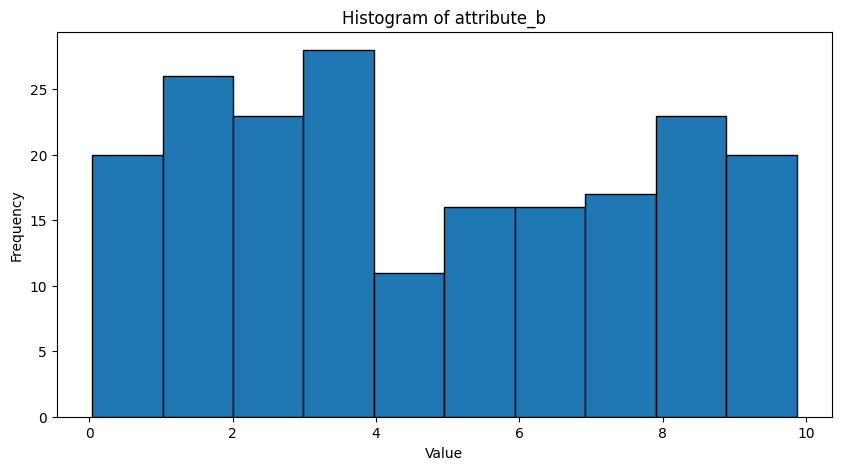

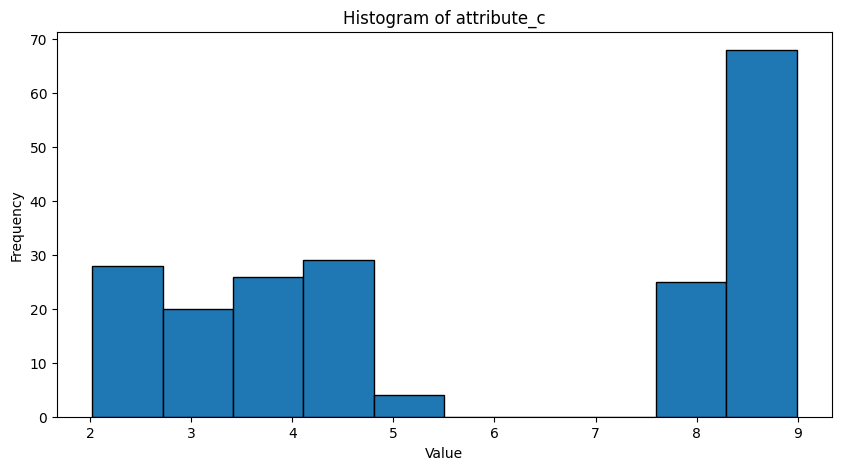

6997

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import gc

# Load the data into a pandas DataFrame
query = "SELECT * FROM random_data"
df = pd.read_sql_query(query, db)

# Plot histogram for item_first_float (attribute b)
plt.figure(figsize=(10, 5))
plt.hist(df['attribute_b'], bins=10, edgecolor='k')
plt.title('Histogram of attribute_b')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display plot histogram
plt.show()

# Plot histogram for item_second_float (attribute c)
plt.figure(figsize=(10, 5))
plt.hist(df['attribute_c'], bins=10, edgecolor='k')
plt.title('Histogram of attribute_c')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display plot histogram
plt.show()

# Free up memory
del df
del query
gc.collect()

Median for attribute b: 2.0
Mean for attribute b: 2
Standard Deviation for attribute b: 0.8565444189932842
Median for attribute c: 4.385
Mean for attribute c: 4.76025
Standard Deviation for attribute c: 2.93695008751986


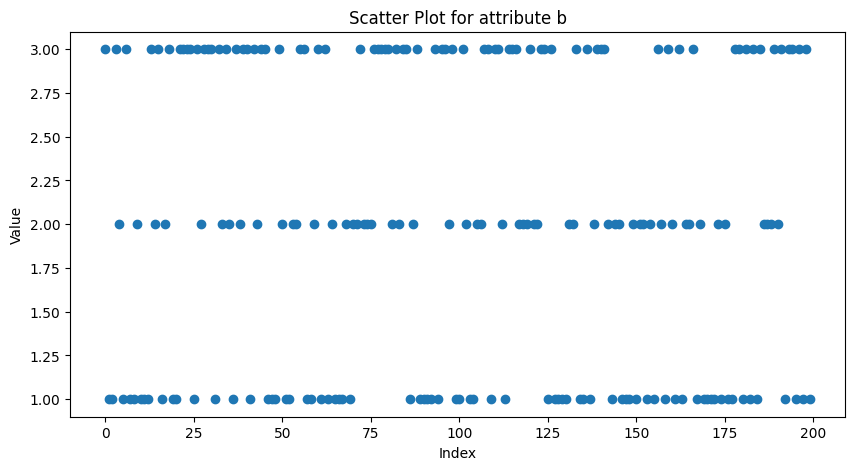

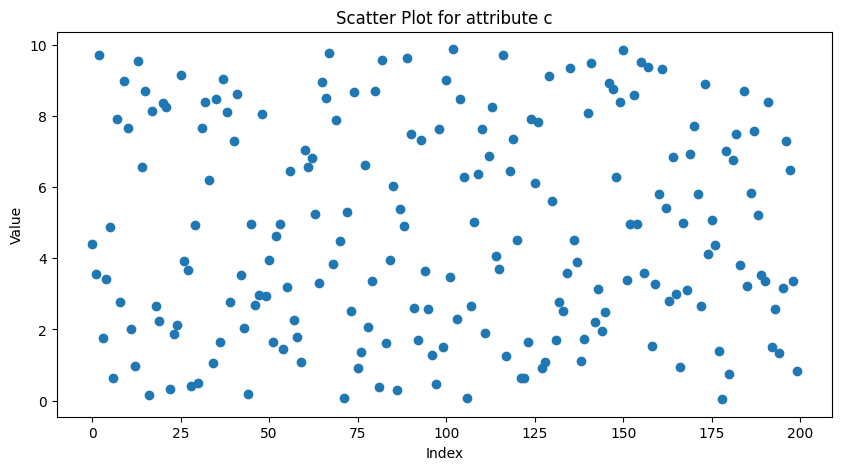

In [4]:
import statistics


# Fetch data from the database
c.execute("SELECT attribute_a, attribute_b FROM random_data")
data = c.fetchall()

# Separate the data into two lists for easier analysis
attribute_b, attribute_c = zip(*data)

### Calculate statistics for item_first_float (attribute b) ###

# Calculate statistics for item_first_float (attribute b)
median_b = statistics.median(attribute_b)
mean_b = statistics.mean(attribute_b)
std_dev_b = statistics.stdev(attribute_b)

# Print statistics for attribute b
print(f'Median for attribute b: {median_b}')
print(f'Mean for attribute b: {mean_b}')
print(f'Standard Deviation for attribute b: {std_dev_b}')

### Calculate statistics for item_second_float (attribute c) ###

# Calculate statistics for item_second_float (attribute c)
median_c = statistics.median(attribute_c)
mean_c = statistics.mean(attribute_c)
std_dev_c = statistics.stdev(attribute_c)

# Print statistics for attribute c
print(f'Median for attribute c: {median_c}')
print(f'Mean for attribute c: {mean_c}')
print(f'Standard Deviation for attribute c: {std_dev_c}')

### Create scatter plots for item_first_float (attribute b) and item_second_float (attribute c) ###

# Create scatter plot for attribute b
plt.figure(figsize=(10, 5))
plt.scatter(range(len(attribute_b)), attribute_b)
plt.title('Scatter Plot for attribute b')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Create scatter plot for attribute c
plt.figure(figsize=(10, 5))
plt.scatter(range(len(attribute_c)), attribute_c)
plt.title('Scatter Plot for attribute c')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [5]:
import numpy as np


# Fetch data from the database
c.execute("SELECT item_first_float, item_second_float FROM random_data")
data = c.fetchall()

# Separate the data into two lists for easier analysis
attribute_b, attribute_c = zip(*data)

### Calculate statistics for item_first_float (attribute b) ###

# Normalize attribute_b to range [0, 1]
attribute_b = np.array(attribute_b)
min_b = np.min(attribute_b)
max_b = np.max(attribute_b)
attribute_b_norm = (attribute_b - min_b) / (max_b - min_b)

# Calculate statistics for item_first_float (attribute b)
median_b = statistics.median(attribute_b)
mean_b = statistics.mean(attribute_b)
std_dev_b = statistics.stdev(attribute_b)

# Print statistics for attribute b
print(f'Median for attribute b: {median_b}')
print(f'Mean for attribute b: {mean_b}')
print(f'Standard Deviation for attribute b: {std_dev_b}')

### Calculate statistics for item_second_float (attribute c) ###

# Normalize attribute_c to range [5, 100]
attribute_c = np.array(attribute_c)
min_c = np.min(attribute_c)
max_c = np.max(attribute_c)
attribute_c_norm = ((attribute_c - min_c) / (max_c - min_c)) * (100 - 5) + 5

# Calculate statistics for item_second_float (attribute c)
median_c = statistics.median(attribute_c)
mean_c = statistics.mean(attribute_c)
std_dev_c = statistics.stdev(attribute_c)

# Print statistics for attribute c
print(f'Median for attribute c: {median_c}')
print(f'Mean for attribute c: {mean_c}')
print(f'Standard Deviation for attribute c: {std_dev_c}')




### Create scatter plots for item_first_float (attribute b) and item_second_float (attribute c) ###

# Update scatter plot for attribute b
plt.figure(figsize=(10, 5))
plt.scatter(range(len(attribute_b_norm)), attribute_b_norm)
plt.title('Normalized Scatter Plot for attribute b')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.show()

# Update scatter plot for attribute c
plt.figure(figsize=(10, 5))
plt.scatter(range(len(attribute_c_norm)), attribute_c_norm)
plt.title('Normalized Scatter Plot for attribute c')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.show()

# Free up memory
del data
del attribute_b
del attribute_c
gc.collect()

OperationalError: no such column: item_first_float